# Loan Credit Risk Model  
Build a predictive model to understand factors that influence the credit default  


**Status**: On-going  
**Dataset**: here  
**Jupyter notebook**:here

---  
---  

## <span id='all'> Summary</span>  
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aenean interdum ante ut pharetra aliquet. Ut at metus tristique purus cursus consequat. Nulla facilisi. Aliquam erat volutpat. Nunc mauris augue, sodales porttitor mi a, rutrum laoreet odio. Ut in congue lorem, eget malesuada neque. Curabitur risus justo, viverra nec nulla ac, tempor ullamcorper arcu. Vestibulum eget nulla pulvinar, fermentum orci sed, varius tellus. Sed facilisis nunc at felis ultrices posuere.

---  
---  
## <span id='all'>All about Projects</span>  
    
#### Project Context  
From the prespective of financial institution like a bank, finding a good borrower is a must to run their financing businesses. Not only make a bad impact to the business, bad borrowers could also give a negative impact to a broader economic.  
This project will elaborate any factor that affects the credit default and builds a model to predict it.


#### Project Requirement   

1. Explore and prepare the dataset  
2. Train a machine learning model to predict the credit default from borrower.
3. Evaluate model and present findings  

#### Project Planning  
1. Exploratory Data Analysis (EDA)
    - Data Structure Check (shape, datatype, head, tail)
    - Data Quality Check (missing value, outlier, distribution)
    - Data Cleaning (missing value, outlier, inappropiate values, high cardinality)
    - Content Investigation (hypothesis testing, predictive power check through descriptive/visualization and analytics)
2. Data Preporcessing & Feature Engineering
3. Feature Selection
4. Models Training
5. Models Evaluation  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)
sns.set()

In [2]:
ori_df = pd.read_csv('..\\dataset\\loan_data_2007_2014.csv')
df = ori_df.copy()
df.head(3)

C:\Users\ichfa\AppData\Local\Temp\ipykernel_6060\3834898467.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  ori_df = pd.read_csv('..\\dataset\\loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-85,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,Jan-15,171.620,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,Apr-99,5.000,NaN,NaN,3.000,0.000,1687,9.400,4.000,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720,0.000,Nov-01,2.000,NaN,NaN,2.000,0.000,2956,98.500,10.000,f,0.000,0.000,3003.654,3003.650,2400.000,603.650,0.000,0.000,0.000,Jun-14,649.910,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# general info

df.info(verbose=True, memory_usage=True)

# Note:
    ## shape (466285, 75)
    ## 100% missing values columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [3]:
# visualize the missing value

df_isna = df.isna().sum().reset_index()
df_isna.columns = ['feature', 'pcnt_null']
df_isna['pcnt_null'] = df_isna['pcnt_null']/len(df)*100
df_isna.sort_values('pcnt_null', ascending=True, inplace=True)

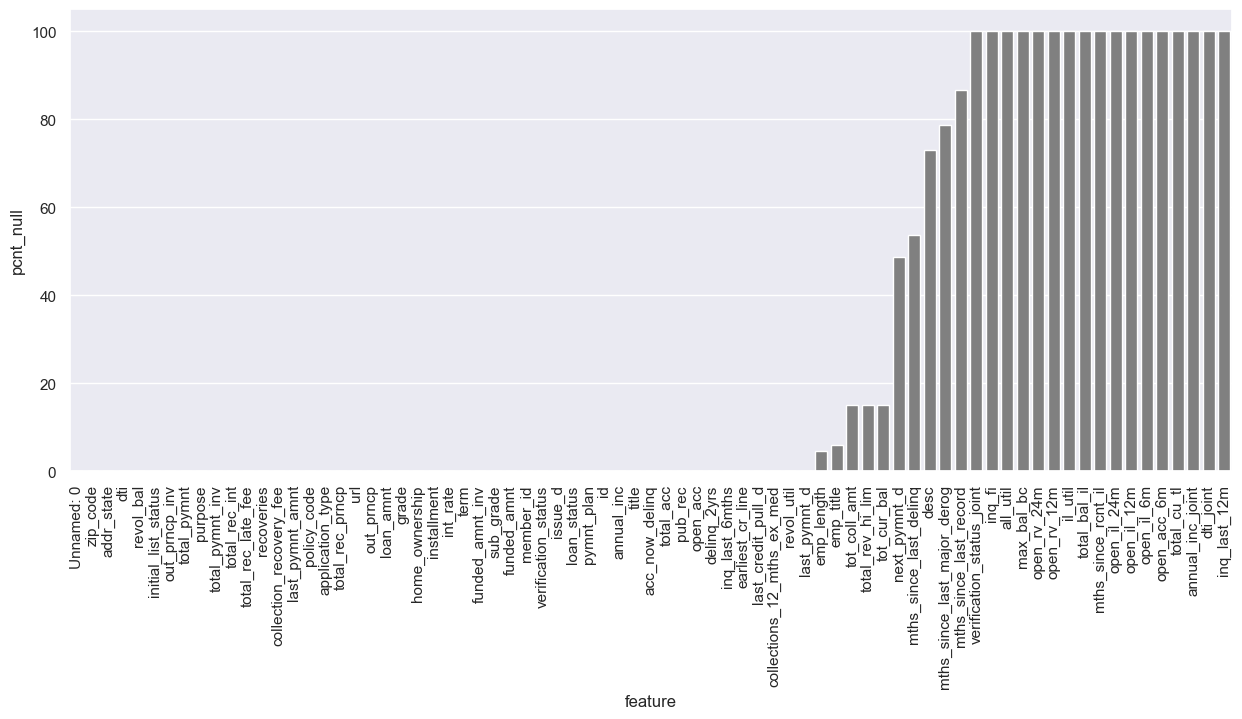

In [4]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_isna['feature'], y=df_isna['pcnt_null'], color='gray')
plt.xticks(rotation=90)
plt.show()

In [5]:
# drop column with missing values more than the threshold

threshold = 70
drop_cols = df_isna[df_isna['pcnt_null'] > threshold]['feature'].values
del df_isna

df.drop(labels = drop_cols, axis=1, inplace=True)

In [29]:
# description numerical feature

df.describe(include='number', datetime_is_numeric=False)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466281.000,466285.000,466256.000,466256.000,215934.000,466256.000,466256.000,466285.000,465945.000,466256.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466140.000,466285.000,466256.000,396009.000,396009.000,396009.000
mean,233142.000,13079729.906,14597660.623,14317.278,14291.801,14222.330,13.829,432.061,73277.381,17.219,0.285,0.805,34.104,11.187,0.161,16230.203,56.177,25.064,4410.062,4408.452,11540.686,11469.893,8866.015,2588.677,0.650,85.344,8.962,3123.914,0.009,1.000,0.004,191.914,138801.713,30379.088
std,134605.029,10893711.625,11682367.441,8286.509,8274.371,8297.638,4.358,243.486,54963.569,7.851,0.797,1.092,21.778,4.988,0.511,20676.245,23.733,11.600,6355.079,6353.198,8265.627,8254.158,7031.688,2483.810,5.266,552.216,85.491,5554.737,0.109,0.000,0.069,14630.215,152114.663,37247.130
min,0.000,54734.000,70473.000,500.000,500.000,0.000,5.420,15.670,1896.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,116571.000,3639987.000,4379705.000,8000.000,8000.000,8000.000,10.990,256.690,45000.000,11.360,0.000,0.000,16.000,8.000,0.000,6413.000,39.200,17.000,0.000,0.000,5552.125,5499.250,3708.560,957.280,0.000,0.000,0.000,312.620,0.000,1.000,0.000,0.000,28618.000,13500.000
50%,233142.000,10107897.000,11941075.000,12000.000,12000.000,12000.000,13.660,379.890,63000.000,16.870,0.000,0.000,31.000,10.000,0.000,11764.000,57.600,23.000,441.470,441.380,9419.251,9355.430,6817.760,1818.880,0.000,0.000,0.000,545.960,0.000,1.000,0.000,0.000,81539.000,22800.000
75%,349713.000,20731209.000,23001541.000,20000.000,20000.000,19950.000,16.490,566.580,88960.000,22.780,0.000,1.000,49.000,14.000,0.000,20333.000,74.700,32.000,7341.650,7338.390,15308.158,15231.310,12000.000,3304.530,0.000,0.000,0.000,3187.510,0.000,1.000,0.000,0.000,208953.000,37900.000
max,466284.000,38098114.000,40860827.000,35000.000,35000.000,35000.000,26.060,1409.990,7500000.000,39.990,29.000,33.000,188.000,84.000,63.000,2568995.000,892.300,156.000,32160.380,32160.380,57777.580,57777.580,35000.030,24205.620,358.680,33520.270,7002.190,36234.440,20.000,1.000,5.000,9152545.000,8000078.000,9999999.000


In [23]:
# description categorical feature

df.describe(exclude='number', datetime_is_numeric=True)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [27]:
# check for entropy

temp_cols = ['term', 'grade', 'sub_grade', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'pymnt_plan']

for col in temp_cols:
    print(df[col].value_counts(normalize=True, dropna=False), end='\n\n')

 36 months   0.725
 60 months   0.275
Name: term, dtype: float64

B   0.294
C   0.269
D   0.165
A   0.161
E   0.077
F   0.028
G   0.007
Name: grade, dtype: float64

B3   0.068
B4   0.065
C1   0.058
C2   0.057
B2   0.057
C3   0.054
B5   0.054
C4   0.052
B1   0.049
C5   0.048
A5   0.047
D1   0.041
A4   0.041
D2   0.037
D3   0.032
D4   0.030
A3   0.027
D5   0.025
A2   0.023
A1   0.023
E1   0.019
E2   0.019
E3   0.015
E4   0.013
E5   0.011
F1   0.008
F2   0.006
F3   0.006
F4   0.004
F5   0.003
G1   0.002
G2   0.002
G3   0.001
G4   0.001
G5   0.001
Name: sub_grade, dtype: float64

Verified          0.360
Source Verified   0.322
Not Verified      0.318
Name: verification_status, dtype: float64

debt_consolidation   0.588
credit_card          0.223
home_improvement     0.057
other                0.051
major_purchase       0.021
small_business       0.015
car                  0.012
medical              0.010
moving               0.006
vacation             0.005
wedding              0.005
house

In [6]:
# drop unnecessary columns

high_card_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'emp_title',]
low_entropy_cols = ['application_type', 'pymnt_plan']

df.drop(labels=high_card_cols, axis=1, inplace=True)
df.drop(labels=low_entropy_cols, axis=1, inplace=True)

In [7]:
# quantile stats description for numerical columns

nmric_cols = df.select_dtypes(include='number').columns
quantile_stat = {}

for col in nmric_cols:
    range_quartile = df[col].max() - df[col].min()
    interquartile = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - 1.5*interquartile
    higher_bound = df[col].quantile(0.75) + 1.5*interquartile
    
    quantile_stat[col] = [range_quartile, interquartile, lower_bound, higher_bound]
    
quantile_stat = pd.DataFrame(quantile_stat).T
quantile_stat.columns = ['range', 'interquartile', 'lower_bound', 'higher_bound']
quantile_stat = pd.concat([df.describe(include='number').T, quantile_stat], axis=1)

quantile_stat['low_outliers'] = np.vectorize(lambda x, y: 1 if x>y else 0)(quantile_stat['lower_bound'], quantile_stat['min'])
quantile_stat['high_outliers'] = np.vectorize(lambda x, y: 1 if x<y else 0)(quantile_stat['higher_bound'], quantile_stat['max'])

quantile_stat.T

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000,466285.000,466285.000,466285.000,466285.000,466281.000,466285.000,466256.000,466256.000,215934.000,466256.000,466256.000,466285.000,465945.000,466256.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466285.000,466140.000,466285.000,466256.000,396009.000,396009.000,396009.000
mean,14317.278,14291.801,14222.330,13.829,432.061,73277.381,17.219,0.285,0.805,34.104,11.187,0.161,16230.203,56.177,25.064,4410.062,4408.452,11540.686,11469.893,8866.015,2588.677,0.650,85.344,8.962,3123.914,0.009,1.000,0.004,191.914,138801.713,30379.088
std,8286.509,8274.371,8297.638,4.358,243.486,54963.569,7.851,0.797,1.092,21.778,4.988,0.511,20676.245,23.733,11.600,6355.079,6353.198,8265.627,8254.158,7031.688,2483.810,5.266,552.216,85.491,5554.737,0.109,0.000,0.069,14630.215,152114.663,37247.130
min,500.000,500.000,0.000,5.420,15.670,1896.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,8000.000,8000.000,8000.000,10.990,256.690,45000.000,11.360,0.000,0.000,16.000,8.000,0.000,6413.000,39.200,17.000,0.000,0.000,5552.125,5499.250,3708.560,957.280,0.000,0.000,0.000,312.620,0.000,1.000,0.000,0.000,28618.000,13500.000
50%,12000.000,12000.000,12000.000,13.660,379.890,63000.000,16.870,0.000,0.000,31.000,10.000,0.000,11764.000,57.600,23.000,441.470,441.380,9419.251,9355.430,6817.760,1818.880,0.000,0.000,0.000,545.960,0.000,1.000,0.000,0.000,81539.000,22800.000
75%,20000.000,20000.000,19950.000,16.490,566.580,88960.000,22.780,0.000,1.000,49.000,14.000,0.000,20333.000,74.700,32.000,7341.650,7338.390,15308.158,15231.310,12000.000,3304.530,0.000,0.000,0.000,3187.510,0.000,1.000,0.000,0.000,208953.000,37900.000
max,35000.000,35000.000,35000.000,26.060,1409.990,7500000.000,39.990,29.000,33.000,188.000,84.000,63.000,2568995.000,892.300,156.000,32160.380,32160.380,57777.580,57777.580,35000.030,24205.620,358.680,33520.270,7002.190,36234.440,20.000,1.000,5.000,9152545.000,8000078.000,9999999.000
range,34500.000,34500.000,35000.000,20.640,1394.320,7498104.000,39.990,29.000,33.000,188.000,84.000,63.000,2568995.000,892.300,155.000,32160.380,32160.380,57777.580,57777.580,35000.030,24205.620,358.680,33520.270,7002.190,36234.440,20.000,0.000,5.000,9152545.000,8000078.000,9999999.000
interquartile,12000.000,12000.000,11950.000,5.500,309.890,43960.000,11.420,0.000,1.000,33.000,6.000,0.000,13920.000,35.500,15.000,7341.650,7338.390,9756.033,9732.060,8291.440,2347.250,0.000,0.000,0.000,2874.890,0.000,0.000,0.000,0.000,180335.000,24400.000


### Inspecting for Outliers

In [8]:
l_outliers_cols = quantile_stat[quantile_stat['low_outliers'] == 1].index # 0 columns
h_outliers_cols = quantile_stat[quantile_stat['high_outliers'] == 1].index # 27 columns

# To do:
    ## later trim the dataset to remove the outliers

In [15]:
# scenario 1 to remove outliers -> 1.5*IQR

list_index = []
for col in h_outliers_cols:
    indexes = df[[col]][df[col] > quantile_stat.T[col].higher_bound].index
    indexes = list(indexes)
    list_index.extend(indexes)
    
list_index = np.array(list_index)

In [21]:
# almost 64% of data will be removed because of outliers in scenario 1

len(np.unique(list_index))/len(df) 

0.6388260398683209

In [31]:
# scenario 2 to remove outliers -> trim >99.9 percentile

list_index = []
for col in h_outliers_cols:
    quantile = df[col].quantile(.999)
    indexes = df[[col]][df[col] > quantile].index
    indexes = list(indexes)
    list_index.extend(indexes)
    
list_index = np.array(list_index)

In [32]:
# trim 99.9 percentile only remove less than 2% of data

len(np.unique(list_index))/len(df) 

0.017800272365613306

In [35]:
# remove outliers with scenario 2

df.drop(labels=list_index, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [36]:
df.shape # final shape

(457985, 47)

### Inspecting for Missing Values

In [41]:
miss_cols = df.isna().sum().reset_index()
miss_cols.columns = ['feature', 'missing']
miss_cols = miss_cols[miss_cols['missing'] > 0]
miss_cols = miss_cols.feature.values

In [42]:
miss_cols

array(['emp_length', 'annual_inc', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'], dtype=object)

In [55]:
# inspecting each column

# df[df['revol_util'].isna()].head()

In [57]:
df[miss_cols].head()

,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,10+ years,24000.000,0.000,Jan-85,1.000,NaN,3.000,0.000,83.700,9.000,Jan-15,NaN,Jan-16,0.000,0.000,NaN,NaN,NaN
1,< 1 year,30000.000,0.000,Apr-99,5.000,NaN,3.000,0.000,9.400,4.000,Apr-13,NaN,Sep-13,0.000,0.000,NaN,NaN,NaN
2,10+ years,12252.000,0.000,Nov-01,2.000,NaN,2.000,0.000,98.500,10.000,Jun-14,NaN,Jan-16,0.000,0.000,NaN,NaN,NaN
3,10+ years,49200.000,0.000,Feb-96,1.000,35.000,10.000,0.000,21.000,37.000,Jan-15,NaN,Jan-15,0.000,0.000,NaN,NaN,NaN
4,1 year,80000.000,0.000,Jan-96,0.000,38.000,15.000,0.000,53.900,38.000,Jan-16,Feb-16,Jan-16,0.000,0.000,NaN,NaN,NaN


In [58]:
df[miss_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457985 entries, 0 to 457984
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   emp_length                  437257 non-null  object 
 1   annual_inc                  457981 non-null  float64
 2   delinq_2yrs                 457958 non-null  float64
 3   earliest_cr_line            457958 non-null  object 
 4   inq_last_6mths              457958 non-null  float64
 5   mths_since_last_delinq      211033 non-null  float64
 6   open_acc                    457958 non-null  float64
 7   pub_rec                     457958 non-null  float64
 8   revol_util                  457656 non-null  float64
 9   total_acc                   457958 non-null  float64
 10  last_pymnt_d                457619 non-null  object 
 11  next_pymnt_d                234434 non-null  object 
 12  last_credit_pull_d          457943 non-null  object 
 13  collections_12

In [69]:
df['emp_length'] = df['emp_length'].str.replace('+','').\
                                    str.replace('< ','').\
                                    str.replace(' years','').\
                                    str.replace(' year','')

df['emp_length'] = df['emp_length'].astype('float32')

In [75]:
# fillna
    ## emp_length = 0
    ## annual_inc = 0
    ## delinq_2yrs = 0
    ## inq_last_6mths = 0
    ## mths_since_last_delinq = 0
    ## open_acc = 0
    ## pub_rec = 0
    ## revol_util = 0
    ## total_acc = 0
    ## collections_12_mths_ex_med = 0
    ## acc_now_delinq = 0
    ## 'tot_coll_amt',  = 0
    ## 'tot_cur_bal',  = 0
    ## 'total_rev_hi_lim' = 'funded_amnt'
    
    ## next_pymnt_d = 0 -> feat eng into delta date
    ## last_pymnt_d = 0 -> feat eng into delta date
    ## last_credit_pull_d -> feat eng into delta date
    ## earliest_cr_line = 0  -> feat eng into delta date

  
temp_cols = ['emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
             'open_acc', 'pub_rec','revol_util','total_acc','collections_12_mths_ex_med','acc_now_delinq',
             'tot_coll_amt','tot_cur_bal']

for col in temp_cols:
    df[col].fillna(value=0, inplace=True)
    
df['total_rev_hi_lim'].fillna(value=df['funded_amnt'], inplace=True)

### Inspecting Inappropiate Value in Date Features

In [60]:
temp_cols = ['earliest_cr_line', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']

for col in temp_cols:
    df[col] = pd.to_datetime(df[col], format='%b-%y')

In [63]:
for col in temp_cols:
    print(f'{col} min is = {df[col].min()}')
    print(f'{col} max is = {df[col].max()}')
    print('')

earliest_cr_line min is = 1969-01-01 00:00:00
earliest_cr_line max is = 2068-12-01 00:00:00

next_pymnt_d min is = 2008-01-01 00:00:00
next_pymnt_d max is = 2016-03-01 00:00:00

last_pymnt_d min is = 2007-12-01 00:00:00
last_pymnt_d max is = 2016-01-01 00:00:00

last_credit_pull_d min is = 2007-05-01 00:00:00
last_credit_pull_d max is = 2016-01-01 00:00:00



In [82]:
# assume that now is '2017-12-01'
# convert into montly unit

date_now = pd.to_datetime('2017-12-01')
temp_cols = ['earliest_cr_line', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']

for col in temp_cols:
    df[col] = round(pd.to_numeric((date_now - df[col])/np.timedelta64(1, 'M')), 3)

In [85]:
temp_indexes = df[['earliest_cr_line']][df['earliest_cr_line'] < 0].index
df['earliest_cr_line'].iloc[temp_indexes] = 0

C:\Users\ichfa\AppData\Local\Temp\ipykernel_6060\597502137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_cr_line'].iloc[temp_indexes] = 0


In [86]:
# negative values in earliest_cr_line are replaced with 0

for col in temp_cols:
    print(f'{col} min is = {df[col].min()}')
    print(f'{col} max is = {df[col].max()}')
    print('')

earliest_cr_line min is = 0.0
earliest_cr_line max is = 586.985

next_pymnt_d min is = 21.027
next_pymnt_d max is = 119.0

last_pymnt_d min is = 22.998
last_pymnt_d max is = 120.019

last_credit_pull_d min is = 22.998
last_credit_pull_d max is = 127.05



In [89]:
# filling missing value

temp_cols = ['earliest_cr_line', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']

for col in temp_cols:
    df[col].fillna(value=0, inplace=True)

In [90]:
# no more missing value

df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [91]:
# save file

df.to_csv('..\\dataset\\cleaned_df.csv')